# **Tutorial 2**


## **Imports**

In [1]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes


In [8]:
#installs for reading the google sheets
!pip install --upgrade gspread
!pip install --upgrade oauth2client
!pip install --upgrade gspread google-auth oauth2client

In [9]:
#authentication
from google.colab import auth
from google.auth.transport.requests import Request
import gspread
from google.auth import default

# Authenticate the user
auth.authenticate_user()

# Get the credentials
creds, _ = default()

# Authorize gspread with the credentials
gc = gspread.authorize(creds)

### Data Collection

In [11]:
#reading the responses
# Open the spreadsheet by its ID
spreadsheet_id = '1SzEokz4ThtbLpjW8n38EGD-0N4R_vXD2nvo1GdKqhuQ'  # Replace with your own spreadsheet ID
worksheet = gc.open_by_key(spreadsheet_id).sheet1

# Read all records into a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,Timestamp,How many siblings do you have?,How tall are you (cm)?
0,3/5/2025 14:46:46,3,172


### Examine Data

Text(0.5, 1.0, 'Number of Siblings')

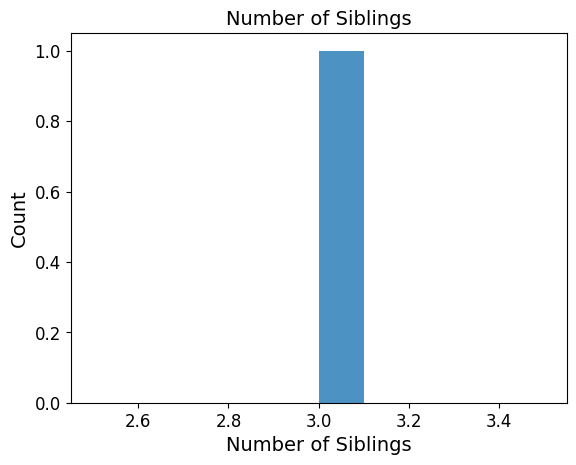

In [13]:
#number of siblings - discrete
num_sibs = df['How many siblings do you have?']

plt.hist(num_sibs, alpha = 0.8)
plt.xlabel('Number of Siblings', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Siblings', fontsize = 14)

plt.savefig("num_sibs.png", bbox_inches='tight')
files.download("num_sibs.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

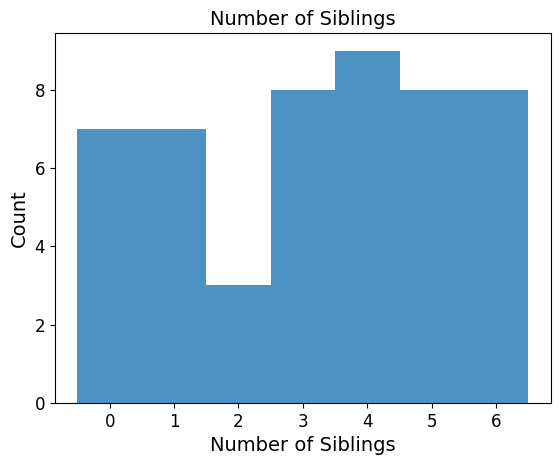

In [34]:
#creating temporary data

num_sibs = np.random.randint(0, 8, size = 50)

plt.hist(num_sibs, align = 'left', bins = 7, alpha = 0.8)
plt.xlabel('Number of Siblings', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Siblings', fontsize = 14)

plt.savefig("num_sibs.png", bbox_inches='tight')
files.download("num_sibs.png")

Text(0.5, 1.0, 'Height')

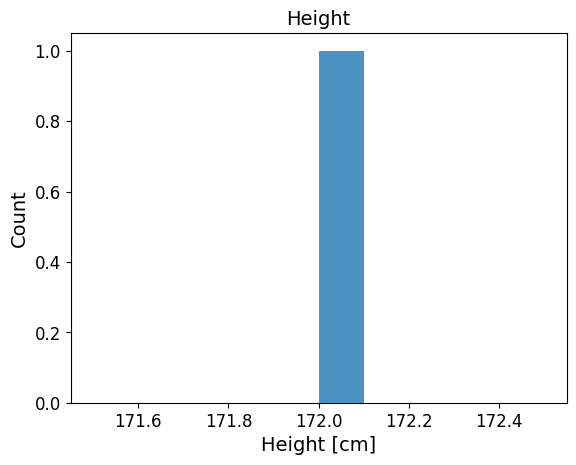

In [17]:
#heights - continuous
heights = df['How tall are you (cm)?']

plt.hist(heights, bins = 5, alpha = 0.8)
plt.xlabel('Height [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Height', fontsize = 14)

plt.savefig("height.png", bbox_inches='tight')
files.download("height.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

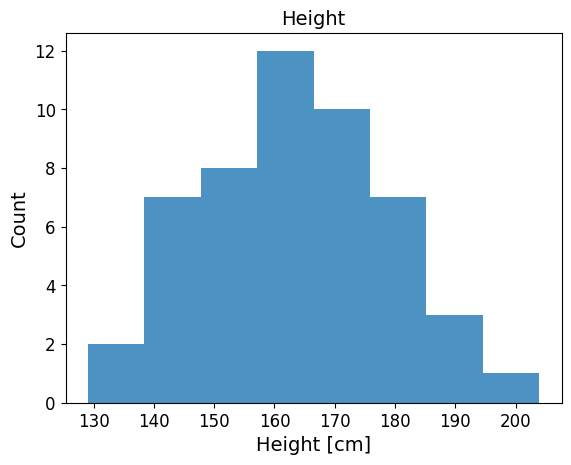

In [43]:
#creating temporary data
heights = np.random.normal(165, 15, size=50)


plt.hist(heights, bins = 8, alpha = 0.8)
plt.xlabel('Height [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Height', fontsize = 14)

plt.savefig("height.png", bbox_inches='tight')
files.download("height.png")

### Summary Statistics Explanations Codes

Central Tendency

(0.0, 0.8)

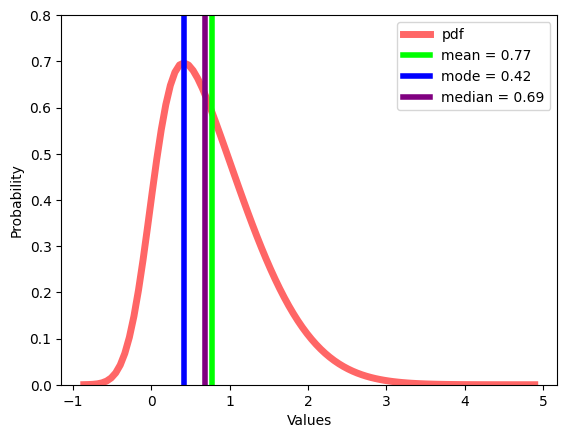

In [61]:
# generate population distribution
mean, var, skew, kurt = stats.skewnorm.stats(4, moments='mvsk')
x = np.linspace(stats.skewnorm.ppf(0.00001, 4), stats.skewnorm.ppf(0.999999, 4), 100)
plt.plot(x, stats.skewnorm.pdf(x, 4), 'r-', lw = 5, alpha = 0.6, label = 'pdf')
r = stats.skewnorm.rvs(4, size = 10000) #get some values
#get pdf for computing mode
t=stats.skewnorm.pdf(x, 4)

data_mode = x[np.argmax(t)] #mode is the value with the highest occurence
data_median = np.median(r)

plt.plot([mean, mean] , [0, 0.8], color = 'lime', linewidth = 4,
           label = f'mean = {round(mean,2)}')

plt.plot([data_mode, data_mode] , [0, 0.8], color = 'blue', linewidth = 4,
           label = f'mode = {round(data_mode,2)}')

plt.plot([data_median, data_median] , [0, 0.8], color = 'purple', linewidth = 4,
           label = f'median = {round(data_median,2)}')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.ylim([0, 0.8])

#plt.savefig("Population.png", bbox_inches='tight')
#files.download("Population.png")

Spread

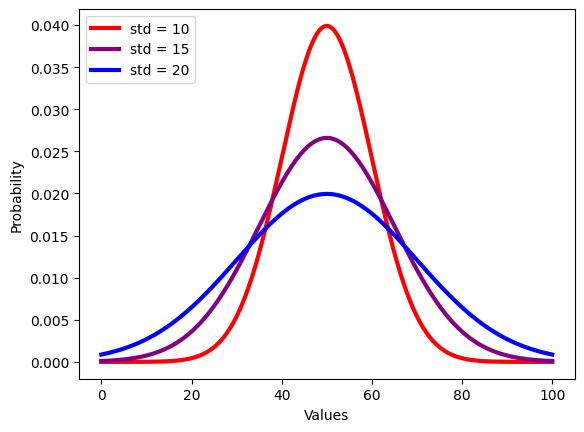

In [62]:
# examining normal distribution with different variances
x = np.linspace(0, 100, 1000)
#three different probability density functions
pdf1 = stats.norm.pdf(x, 50, 10)
pdf2 = stats.norm.pdf(x, 50, 15)
pdf3 = stats.norm.pdf(x, 50, 20)

plt.plot(x, pdf1, color = 'red', lw = 3, label = 'std = 10')
plt.plot(x, pdf2, color = 'purple', lw = 3, label = 'std = 15')
plt.plot(x, pdf3, color = 'blue', lw = 3, label = 'std = 20')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend(loc = 'upper left')

#plt.savefig("std.png", bbox_inches='tight')
#files.download("std.png")

Skewness

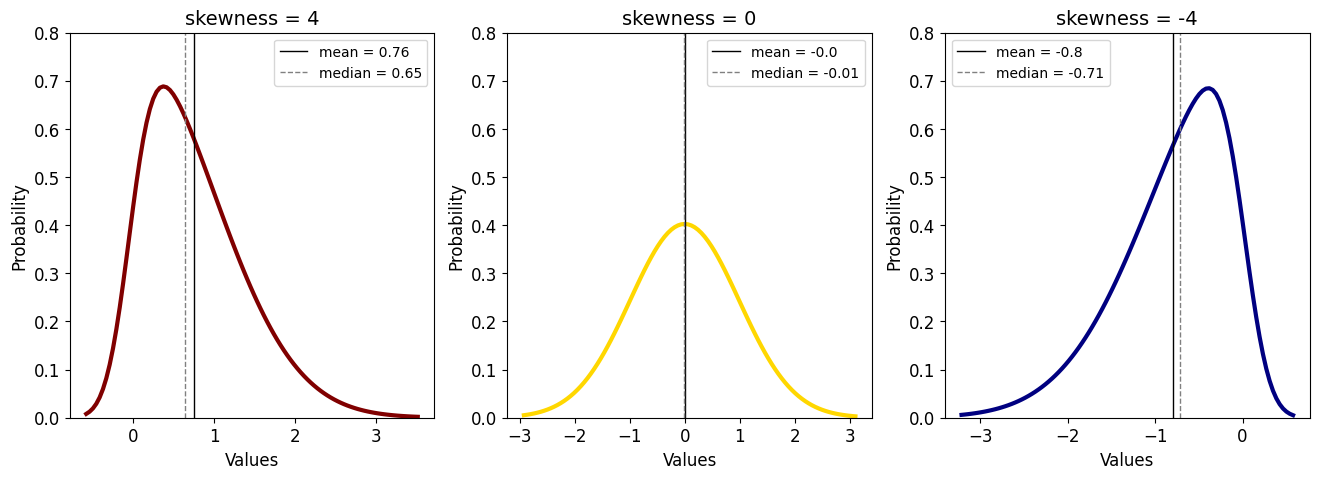

In [63]:
#creating distribution with different skewness values
data = stats.skewnorm(4, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 1)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'maroon', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper right')
plt.title('skewness = 4', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = stats.skewnorm(0, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 2)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'gold', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper right')
plt.title('skewness = 0', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = stats.skewnorm(-4, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 3)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'navy', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper left')
plt.title('skewness = -4', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.set_size_inches(16, 5)

#plt.savefig("skewness.png", bbox_inches='tight')
#files.download("skewness.png")

Kurtosis

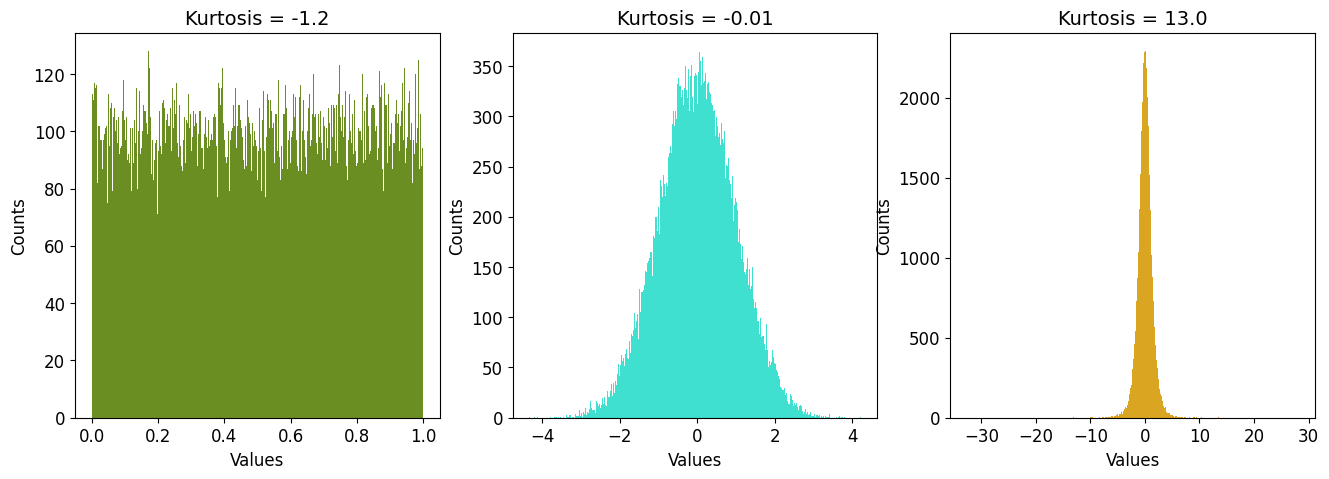

In [64]:
#creating datasets with different kurtosis values
data = np.random.normal(0, 1, 100000)
plt.subplot(1, 3, 2)
plt.hist(data, bins = 1000, color = 'turquoise');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = np.random.uniform(0, 1, 100000)
plt.subplot(1, 3, 1)
plt.hist(data, bins = 1000, color = 'olivedrab');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = np.random.standard_t(4, 100000)
plt.subplot(1, 3, 3)
plt.hist(data, bins = 1000, color = 'goldenrod');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.set_size_inches(16, 5)

#plt.savefig("kurtosis.png", bbox_inches='tight')
#files.download("kurtosis.png")

### Summary Statistics On Our Data

Central Tendency

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

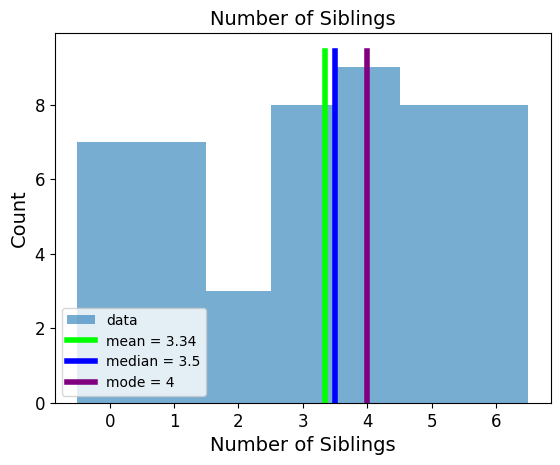

In [51]:
#number of siblings
num_sibs_mean = np.mean(num_sibs)
num_sibs_median = np.median(num_sibs)
num_sibs_mode = stats.mode(num_sibs)[0]


plt.hist(num_sibs, align = 'left', bins = 7, alpha = 0.6, label = 'data')

ylim = plt.gca().get_ylim()

plt.plot([num_sibs_mean, num_sibs_mean] , ylim, color = 'lime', linewidth = 4,
           label = f'mean = {round(num_sibs_mean, 2)}')

plt.plot([num_sibs_median, num_sibs_median] , ylim, color = 'blue', linewidth = 4,
           label = f'median = {round(num_sibs_median, 2)}')

plt.plot([num_sibs_mode, num_sibs_mode] , ylim, color = 'purple', linewidth = 4,
           label = f'mode = {round(num_sibs_mode, 2)}')

plt.xlabel('Number of Siblings', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'lower left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Siblings', fontsize = 14)

plt.savefig("num_sibs_central.png", bbox_inches='tight')
files.download("num_sibs_central.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

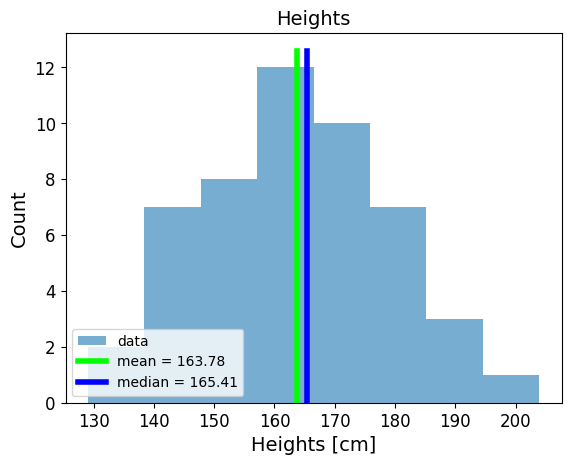

In [60]:
#heights
heights_mean = np.mean(heights)
heights_median = np.median(heights)

plt.hist(heights, bins = 8, alpha = 0.6, label = 'data')

ylim = plt.gca().get_ylim()

plt.plot([heights_mean, heights_mean] , ylim, color = 'lime', linewidth = 4,
           label = f'mean = {round(heights_mean, 2)}')

plt.plot([heights_median, heights_median] , ylim, color = 'blue', linewidth = 4,
           label = f'median = {round(heights_median, 2)}')


plt.xlabel('Heights [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'lower left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heights', fontsize = 14)

plt.savefig("heights_central.png", bbox_inches='tight')
files.download("heights_central.png")


Spread

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

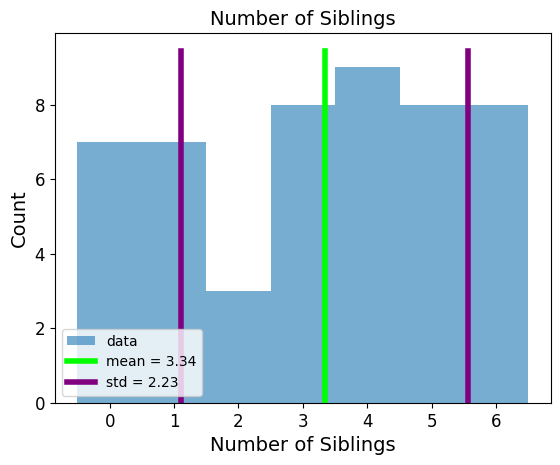

In [66]:
#number of siblings
num_sibs_std = np.std(num_sibs, ddof = 1)

plt.hist(num_sibs, align = 'left', bins = 7, alpha = 0.6, label = 'data')

ylim = plt.gca().get_ylim()


plt.plot([num_sibs_mean, num_sibs_mean] , ylim, color = 'lime', linewidth = 4,
           label = f'mean = {round(num_sibs_mean, 2)}')

plt.plot([num_sibs_mean + num_sibs_std, num_sibs_mean + num_sibs_std] , ylim, color = 'purple', linewidth = 4,
           label = f'std = {round(num_sibs_std, 2)}')

plt.plot([num_sibs_mean - num_sibs_std, num_sibs_mean - num_sibs_std] , ylim, color = 'purple', linewidth = 4)

plt.xlabel('Number of Siblings', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'lower left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Siblings', fontsize = 14)

plt.savefig("num_sibs_spread.png", bbox_inches='tight')
files.download("num_sibs_spread.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

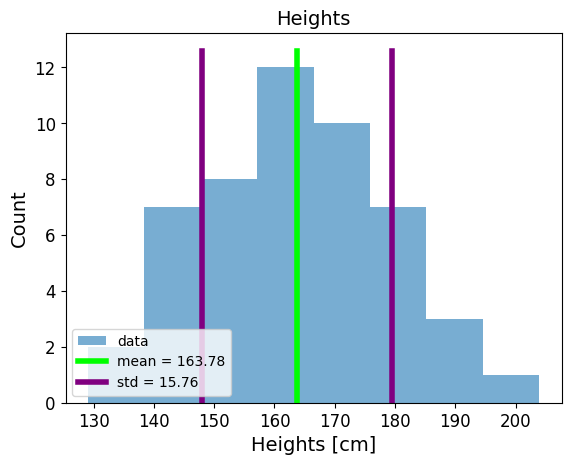

In [68]:
#heights
heights_std = np.std(heights, ddof = 1)

plt.hist(heights, bins = 8, alpha = 0.6, label = 'data')

ylim = plt.gca().get_ylim()


plt.plot([heights_mean, heights_mean] , ylim, color = 'lime', linewidth = 4,
           label = f'mean = {round(heights_mean, 2)}')

plt.plot([heights_mean + heights_std, heights_mean + heights_std] , ylim, color = 'purple', linewidth = 4,
           label = f'std = {round(heights_std, 2)}')

plt.plot([heights_mean - heights_std, heights_mean - heights_std] , ylim, color = 'purple', linewidth = 4)


plt.xlabel('Heights [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'lower left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heights', fontsize = 14)

plt.savefig("heights_spread.png", bbox_inches='tight')
files.download("heights_spread.png")


Skewness and Kurtosis

In [79]:
#skewness
num_sibs_skew = stats.skew(num_sibs)
heights_skew = stats.skew(heights)

#kurtosis
num_sibs_kurtosis = stats.kurtosis(num_sibs)
heights_kurtosis = stats.kurtosis(heights)

print(f'Skewness of Number of Siblings = {round(num_sibs_skew, 2)}')
print(f'Skewness of Heights = {round(heights_skew, 2)}')

print(f'Kurtosis of Number of Siblings = {round(num_sibs_kurtosis, 2)}')
print(f'Kurtosis of Heights = {round(heights_kurtosis, 2)}')



Skewness of Number of Siblings = 0.02
Skewness of Heights = 0.05
Kurtosis of Number of Siblings = -1.03
Kurtosis of Heights = -0.28


### Distributions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

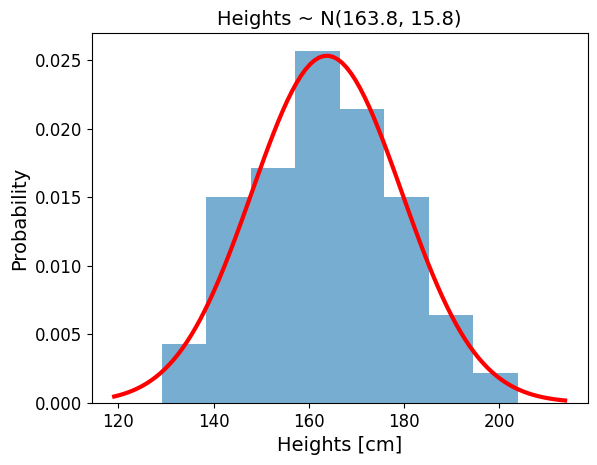

In [82]:
#heights
plt.hist(heights, bins = 8, alpha = 0.6, density = True)

pdf_h = stats.norm.pdf(np.linspace(np.min(heights) - 10, np.max(heights) + 10, 100), heights_mean, heights_std)
plt.plot(np.linspace(np.min(heights) - 10, np.max(heights) + 10, 100), pdf_h, color = 'red', lw = 3)

plt.xlabel('Heights [cm]', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(f'Heights ~ N({round(heights_mean,1)}, {round(heights_std,1)})', fontsize = 14)

plt.savefig("heights_dist.png", bbox_inches='tight')
files.download("heights_dist.png")

#### **Preliz**

In [86]:
!pip install preliz
!pip install --upgrade scipy

import preliz as pz

Normal Distribution

In [88]:
pz.Normal(mu = 50, sigma = 5).plot_interactive()

interactive(children=(FloatSlider(value=50.0, description='mu (-inf, inf)', max=150.0, min=-50.0, step=1.0, st…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

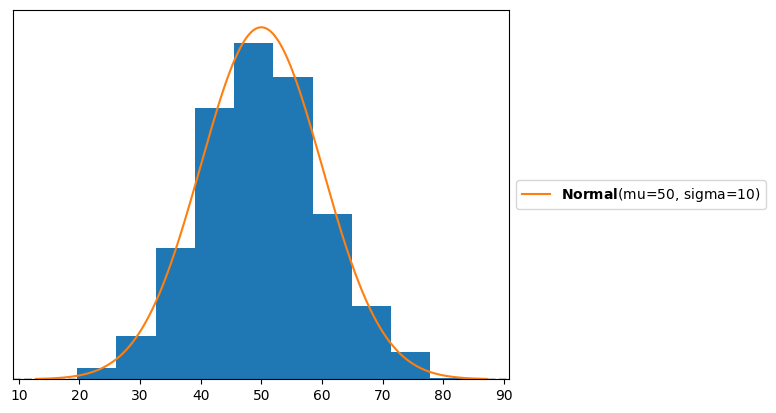

In [93]:
plt.hist(pz.Normal(mu = 50, sigma = 10).rvs(1000), density = True)
pz.Normal(mu = 50, sigma = 10).plot_pdf()

plt.savefig("normal.png", bbox_inches='tight')
files.download("normal.png")

Uniform - continuous

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

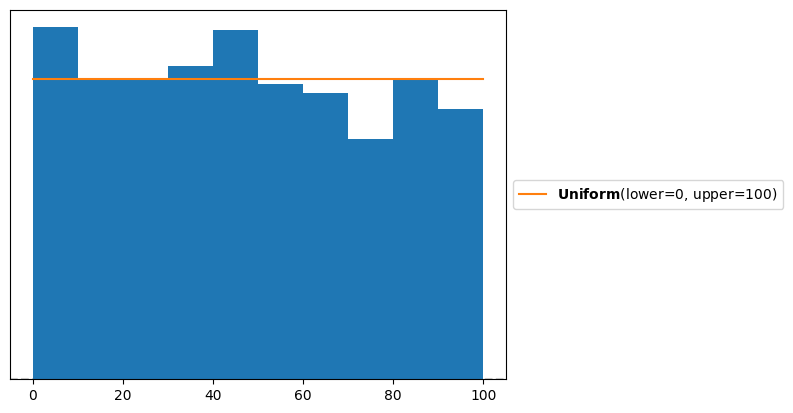

In [97]:
plt.hist(pz.Uniform(lower = 0, upper = 100).rvs(1000), density = True)
pz.Uniform(lower = 0, upper = 100).plot_pdf()

plt.savefig("uniform.png", bbox_inches='tight')
files.download("uniform.png")

Bernoulli

In [103]:
pz.Bernoulli(p=0.5).plot_interactive()

interactive(children=(FloatSlider(value=0.5, description='p (0, 1)', max=1.0, min=2.220446049250313e-16, step=…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

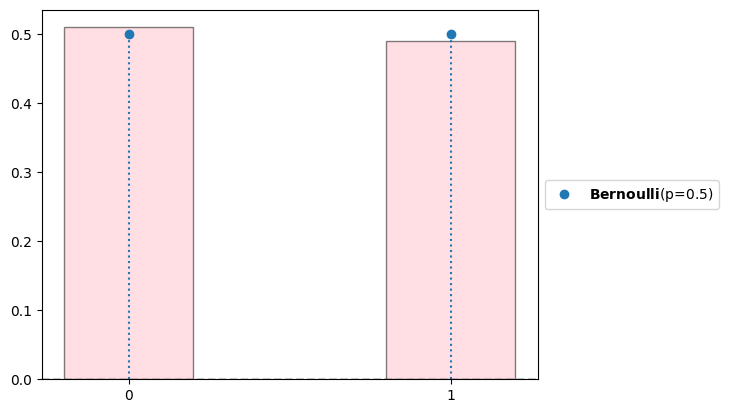

In [119]:
#p=0.5
samples = pz.Bernoulli(p=0.5).rvs(1000)

# Calculate the probability (or relative frequency) of each outcome (0 and 1)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

# Plot the probabilities using a bar plot
plt.bar(values, probabilities, width=0.4, color='pink', alpha = 0.5, edgecolor='black')

pz.Bernoulli(p=0.5).plot_pdf()

plt.savefig("bernoulli05.png", bbox_inches='tight')
files.download("bernoulli05.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

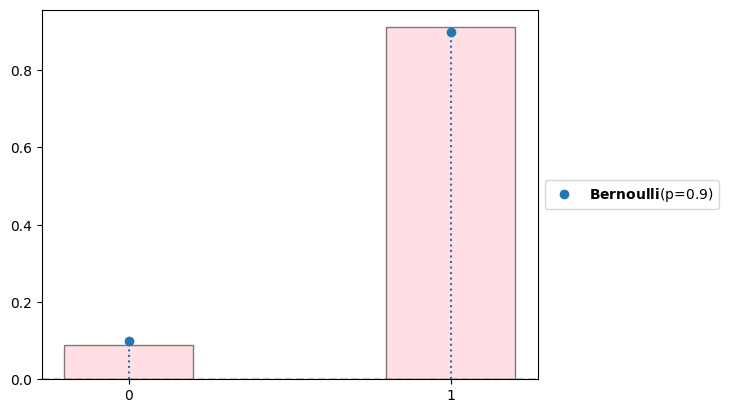

In [120]:
#p=0.9
samples = pz.Bernoulli(p=0.9).rvs(1000)

# Calculate the probability (or relative frequency) of each outcome (0 and 1)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

# Plot the probabilities using a bar plot
plt.bar(values, probabilities, width=0.4, color='pink', alpha = 0.5, edgecolor='black')

pz.Bernoulli(p=0.9).plot_pdf()

plt.savefig("bernoulli09.png", bbox_inches='tight')
files.download("bernoulli09.png")

Binomial

In [121]:
pz.Binomial(n = 10, p=0.5).plot_interactive()

interactive(children=(IntSlider(value=10, description='n (0, inf)', max=110, style=SliderStyle(description_wid…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

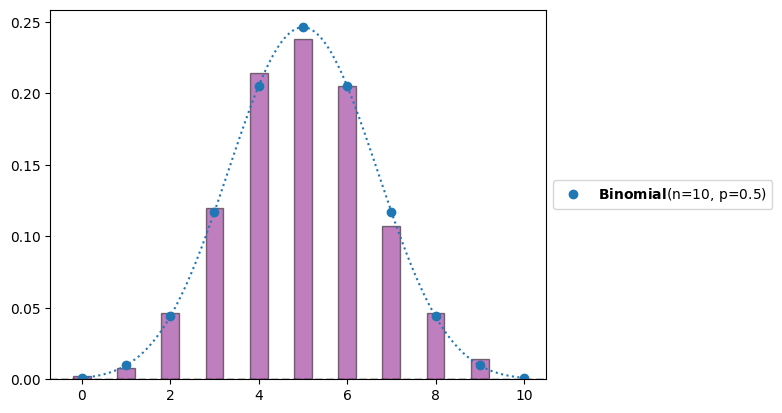

In [126]:
#p=0.5
samples = pz.Binomial(n = 10, p=0.5).rvs(1000)

# Calculate the probability (or relative frequency) of each outcome (0 and 1)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

# Plot the probabilities using a bar plot
plt.bar(values, probabilities, width=0.4, color='purple', alpha = 0.5, edgecolor='black')

pz.Binomial(n = 10, p=0.5).plot_pdf()

plt.savefig("binomial05.png", bbox_inches='tight')
files.download("binomial05.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

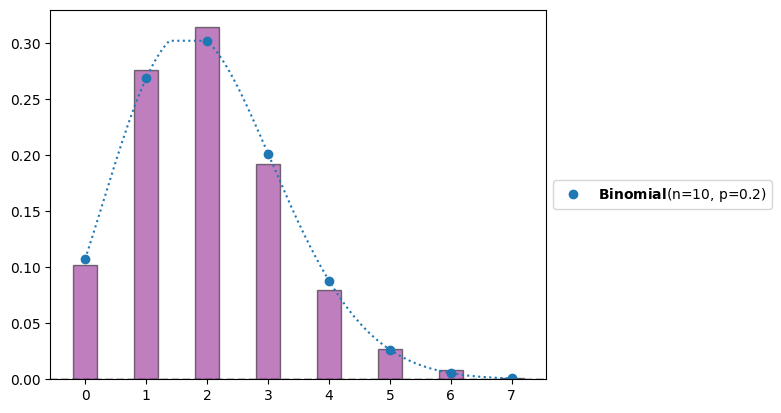

In [127]:
#p=0.2
samples = pz.Binomial(n = 10, p=0.2).rvs(1000)

# Calculate the probability (or relative frequency) of each outcome (0 and 1)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

# Plot the probabilities using a bar plot
plt.bar(values, probabilities, width=0.4, color='purple', alpha = 0.5, edgecolor='black')

pz.Binomial(n = 10, p=0.2).plot_pdf()

plt.savefig("binomial02.png", bbox_inches='tight')
files.download("binomial02.png")

Poisson

In [129]:
pz.Poisson(mu = 3).plot_interactive()

interactive(children=(FloatSlider(value=3.0, description='mu (0, inf)', max=13.0, min=2.220446049250313e-16, s…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

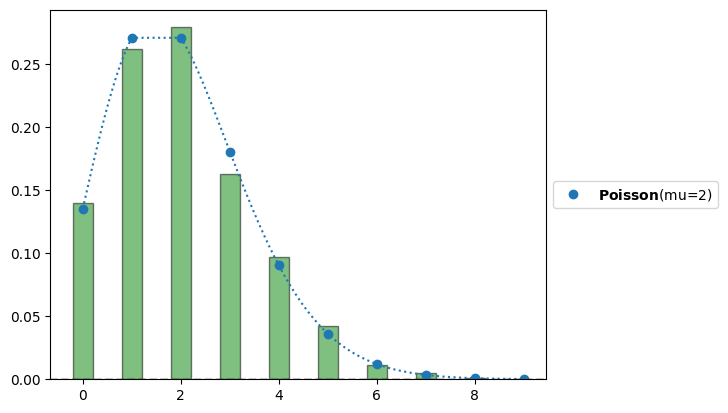

In [132]:
samples = pz.Poisson(mu = 3).rvs(1000)

# Calculate the probability (or relative frequency) of each outcome (0 and 1)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

# Plot the probabilities using a bar plot
plt.bar(values, probabilities, width=0.4, color='green', alpha = 0.5, edgecolor='black')

pz.Poisson(mu = 3).plot_pdf()

plt.savefig("poisson.png", bbox_inches='tight')
files.download("poisson.png")